In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
import os
import sys
import time
import mahotas as mh
from skimage import measure
from tqdm.notebook import tqdm
from image.controller import ImageController

In [27]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
file_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/wild_type_raw/000000_000000_000188_000000.tif'
plot_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/compare_plots/000000_000000_000188_000000.png'

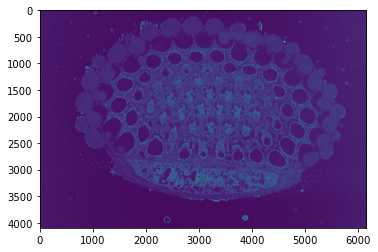

In [45]:
data = ImageController.read(file_path)
ImageController.display(data)

In [46]:
data_crop = ImageController.center_crop(data)

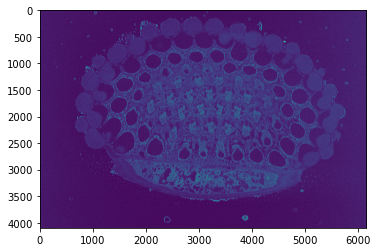

In [47]:
normalized_data = ImageController.normalize(data)
ImageController.display(normalized_data)

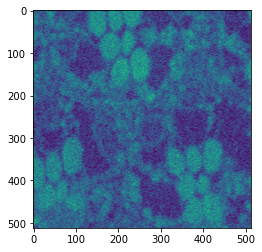

In [48]:
crop_data = ImageController.center_crop(normalized_data)
ImageController.display(crop_data)

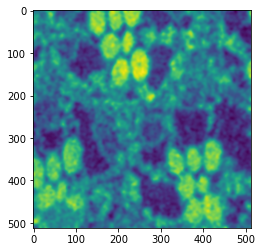

In [49]:
smoothed_data = ImageController.smooth(crop_data)
ImageController.display(smoothed_data)

In [50]:
smoothed_data.mean()

46.46668424798455

In [57]:
threshold_data = ImageController.threshold(smoothed_data, threshold_value=61)

In [58]:
labeled_data, nr_count = ImageController.label(threshold_data)

In [59]:
selected_labeled_data = ImageController.select_regions(labeled_data, region_size=750)

In [60]:
binary_mask_data = ImageController.binary_mask(selected_labeled_data)

In [61]:
closed_binary_mask_data = ImageController.close_binary_mask(binary_mask_data)

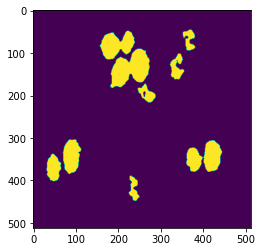

In [70]:
ImageController.display(closed_binary_mask_data)

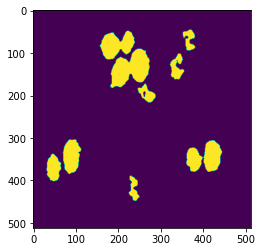

In [62]:
segmented_image = ImageController.binary_image(closed_binary_mask_data)
ImageController.display(segmented_image)

In [69]:
from skimage import filters
threshold = filters.threshold_otsu(closed_binary_mask_data)
threshold

0

In [41]:
np.sum(segmented_image)

24946

In [43]:
ImageController.display_and_save_compare_labeled(data_crop, binary_mask_data, segmented_image, plot_path)